In [41]:
import json
import csv
from operator import itemgetter
import matplotlib.pyplot as plt


In [2]:
f = open("../large_data/pfam.json")
domains = json.load(f)
f.close()


In [12]:
len(domains)

116459

In [3]:
f = open("../large_data/all_specific_genes_stats_full.json")
all_specific_genes_stats = json.load(f)
f.close()


assign domains to trg's

In [17]:
for key in domains:
    all_specific_genes_stats[key]["domains"] = list()
    for domain in domains[key]:
        all_specific_genes_stats[key]["domains"].append(domain[0])


split trgs into genus and species specific

In [20]:
genus_specific = dict()
species_specific = dict()

for id in all_specific_genes_stats:
    gene = all_specific_genes_stats[id]
    try:
        domains_to_add = gene["domains"] 
    except KeyError:
        domains_to_add = []

    if gene["genus_specific_to"] is None:
        species_specific[id] = domains_to_add
    else:
        genus_specific[id] = domains_to_add


no domains in species specific trgs

In [25]:
for key in all_specific_genes_stats:
    if all_specific_genes_stats[key]["genus_specific_to"] is None:
        try:
            if all_specific_genes_stats[key]['domains']:
                print(species_specific[key])
        except KeyError:
            pass

for key in species_specific:
    if species_specific[key] != []:
        print(species_specific[key])
        

In [26]:
def how_many_has_more_than_one_domain(d):
    count = 0
    for key in d:
        if d[key] != []:
            count +=1
    return count

In [37]:
sp = how_many_has_more_than_one_domain(species_specific)
gn = how_many_has_more_than_one_domain(genus_specific)


print(f"Species specific genes containing one or more domain: {sp}  ({sp*100/len(species_specific)}%)")
print(f"Genus specific genes containing one or more domain: {gn}  ({gn*100/len(genus_specific)}%)")


Genus specific genes containing one or more domain: 116459  (4.413241505592958%)
Species specific genes containing one or more domain: 0  (0.0%)


In [32]:
all_counts = list()
all_domains = list()
occurences_of_each_count = dict()
for key in genus_specific:
    amount = len(genus_specific[key])
    if amount in occurences_of_each_count:
        occurences_of_each_count[amount] += 1
    else:
        occurences_of_each_count[amount] = 1
    all_counts.append(amount)
    for domain in genus_specific[key]:
        all_domains.append(domain)


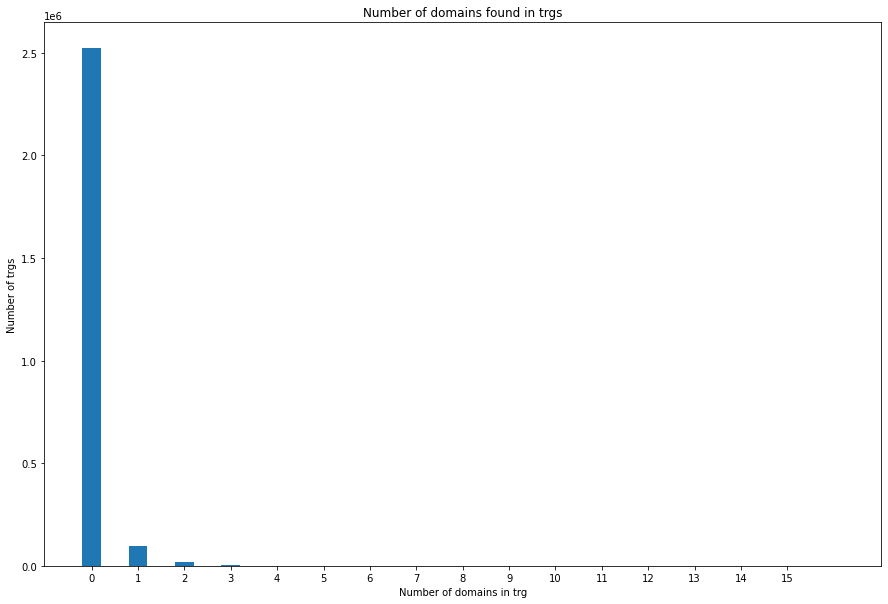

In [40]:
counts = list(occurences_of_each_count.keys())
values = list(occurences_of_each_count.values())

fig = plt.figure(figsize = (10, 5))
plt.xticks(range(len(counts)))
plt.gcf().set_size_inches(15, 10)
plt.bar(counts, values,
        width = 0.4)
 
plt.xlabel("Number of domains in trg")
plt.ylabel("Number of trgs")
plt.title("Number of domains found in trgs")
plt.show()

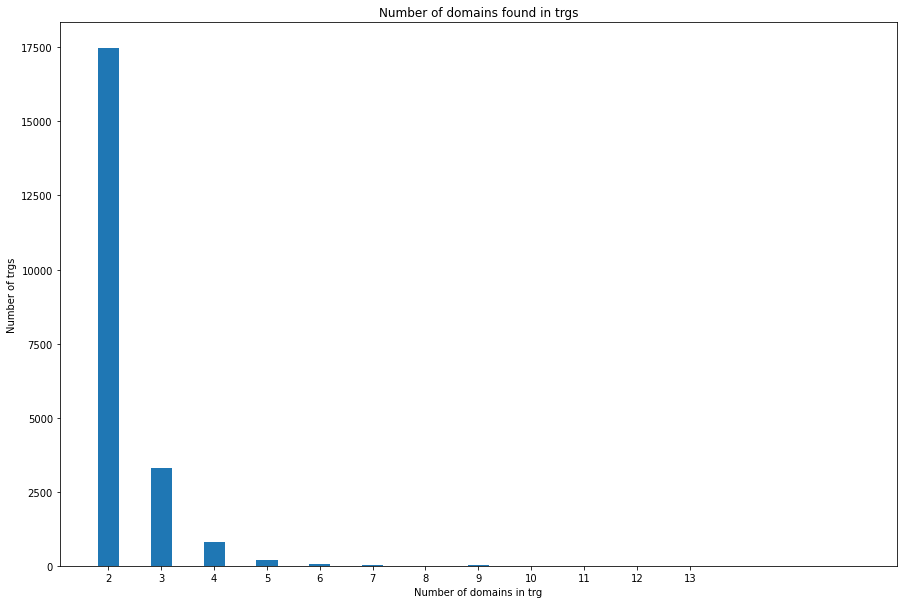

In [44]:
occurences_of_each_count.pop(0,None)
occurences_of_each_count.pop(1,None)
counts = list(occurences_of_each_count.keys())
values = list(occurences_of_each_count.values())

fig = plt.figure(figsize = (10, 5))
plt.xticks(range(len(counts)))
plt.gcf().set_size_inches(15, 10)
plt.bar(counts, values,
        width = 0.4)
 
plt.xlabel("Number of domains in trg")
plt.ylabel("Number of trgs")
plt.title("Number of domains found in trgs")
plt.show()

### Total number of different domains

In [45]:
len(set(all_domains))


5316

In [46]:
counts = [(i, all_domains.count(i)) for i in set(all_domains)]


### Top 10 most popular domains

In [14]:
(sorted(counts, key=itemgetter(1), reverse=True))[0:10]


[('PE', 4567),
 ('PPE', 2619),
 ('MMPL', 2480),
 ('DUF732', 2378),
 ('PPE-SVP', 1947),
 ('DUF6124', 1457),
 ('GntR', 1177),
 ('PknH_C', 1161),
 ('HATPase_c', 956),
 ('PE-PPE', 941)]